## Prostate Cancer Prediction - KNN

In [515]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
df = pd.read_csv(r'Prostate_Cancer.csv')

In [517]:
df.shape

(100, 10)

In [518]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


diagnosis_result is the final output. Let us convert is as M=1 and B=0

In [519]:
df['diagnosis_result']=df['diagnosis_result'].apply(lambda x:1 if x=='M' else 0)

In [520]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [521]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
diagnosis_result,100.0,0.62000,0.487832,0.000,0.0000,1.0000,1.000,1.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


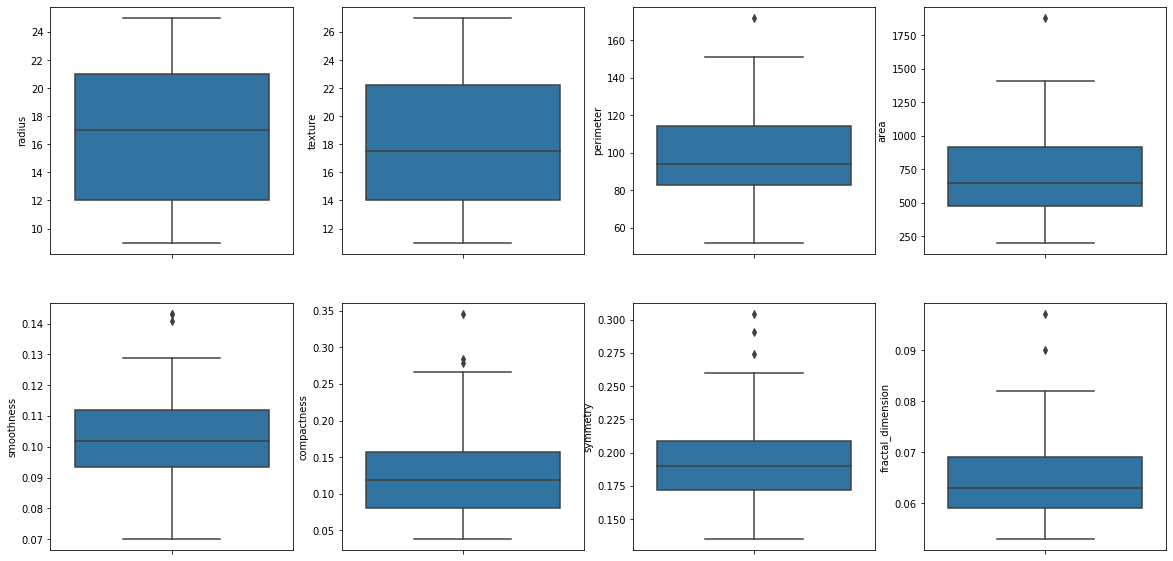

In [522]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y='radius',data = df)
plt.subplot(2,4,2)
sns.boxplot(y='texture',data = df)
plt.subplot(2,4,3)
sns.boxplot(y='perimeter',data = df)
plt.subplot(2,4,4)
sns.boxplot(y='area',data = df)
plt.subplot(2,4,5)
sns.boxplot(y='smoothness',data = df)
plt.subplot(2,4,6)
sns.boxplot(y='compactness',data = df)
plt.subplot(2,4,7)
sns.boxplot(y='symmetry',data = df)
plt.subplot(2,4,8)
sns.boxplot(y='fractal_dimension',data = df)

we can see area has a very high outier present. Let us handle the outlier in the dataset

In [523]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                    49.5000
diagnosis_result       1.0000
radius                 9.0000
texture                8.2500
perimeter             31.7500
area                 440.2500
smoothness             0.0185
compactness            0.0765
symmetry               0.0370
fractal_dimension      0.0100
dtype: float64


In [524]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(91, 10)

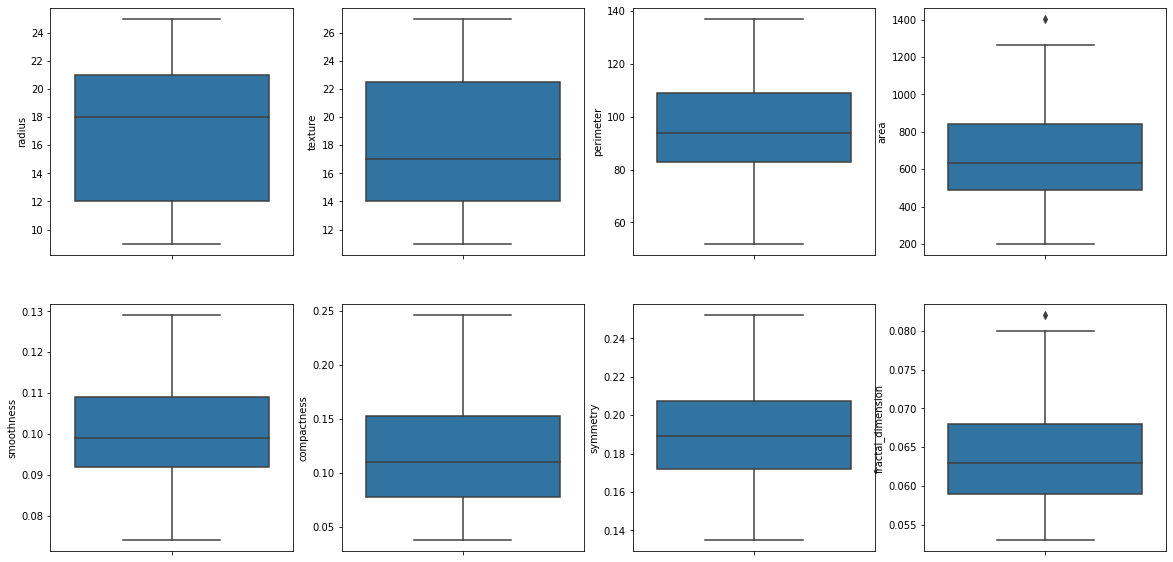

In [525]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y='radius',data = df)
plt.subplot(2,4,2)
sns.boxplot(y='texture',data = df)
plt.subplot(2,4,3)
sns.boxplot(y='perimeter',data = df)
plt.subplot(2,4,4)
sns.boxplot(y='area',data = df)
plt.subplot(2,4,5)
sns.boxplot(y='smoothness',data = df)
plt.subplot(2,4,6)
sns.boxplot(y='compactness',data = df)
plt.subplot(2,4,7)
sns.boxplot(y='symmetry',data = df)
plt.subplot(2,4,8)
sns.boxplot(y='fractal_dimension',data = df)

In [526]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,91.0,51.835165,28.104276,3.000,28.5000,51.000,75.5000,100.000
diagnosis_result,91.0,0.615385,0.489200,0.000,0.0000,1.000,1.0000,1.000
radius,91.0,17.153846,4.786377,9.000,12.0000,18.000,21.0000,25.000
texture,91.0,18.230769,5.217656,11.000,14.0000,17.000,22.5000,27.000
perimeter,91.0,94.780220,20.648273,52.000,83.0000,94.000,109.0000,137.000
area,91.0,678.384615,280.429186,202.000,488.0000,633.000,844.0000,1404.000
smoothness,91.0,0.101220,0.012536,0.074,0.0920,0.099,0.1090,0.129
compactness,91.0,0.118923,0.051021,0.038,0.0775,0.110,0.1530,0.246
symmetry,91.0,0.189132,0.025098,0.135,0.1720,0.189,0.2075,0.252
fractal_dimension,91.0,0.063670,0.006758,0.053,0.0590,0.063,0.0680,0.082


We can see almost all the outliers are deleted

check if there is any column with only on unique value

In [527]:
for i in df.columns:
    if len(df[i].value_counts())==1:
        print(i)

We dont have any column with unique value

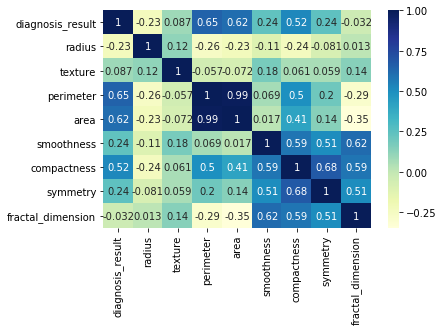

In [528]:
col=df.iloc[:,1:].corr()
sns.heatmap(col, cmap="YlGnBu", annot=True)
plt.show()

We can see that area and perimeter are highly correlated with each other. let us drop are from the dataset

In [529]:
df.drop('perimeter',axis=1,inplace = True)

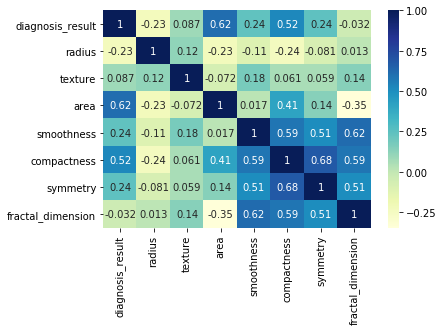

In [530]:
col=df.iloc[:,1:].corr()
sns.heatmap(col, cmap="YlGnBu", annot=True)
plt.show()

In [531]:
df.head()

,id,diagnosis_result,radius,texture,area,smoothness,compactness,symmetry,fractal_dimension
2,3,1,21,27,1203,0.125,0.160,0.207,0.060
5,6,0,25,25,477,0.128,0.170,0.209,0.076
6,7,1,16,26,1040,0.095,0.109,0.179,0.057
7,8,1,15,18,578,0.119,0.165,0.220,0.075
8,9,1,19,24,520,0.127,0.193,0.235,0.074


Let us drop the id column

In [532]:
df1 = df.iloc[:,1:]

In [533]:
from sklearn.model_selection import train_test_split

In [534]:
# Putting feature variable to X
X = df1.drop(['diagnosis_result'], axis=1)
# Putting response variable to y
y = df1['diagnosis_result']

In [535]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scale the feature

In [536]:
from sklearn.preprocessing import StandardScaler

In [537]:
scaler = StandardScaler()
a = list(X_train.columns)
X_train[a]= scaler.fit_transform(X_train[a])
X_train.head()

C:\Users\91973\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91973\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,radius,texture,area,smoothness,compactness,symmetry,fractal_dimension
47,0.694718,-0.862800,-0.468663,1.227153,0.185346,1.094998,0.680186
85,-0.624897,-1.056239,1.411738,-0.180000,-0.184043,1.094998,-0.531170
26,-1.504640,1.071591,-0.085618,0.316642,1.498725,1.589513,0.831606
91,-1.504640,-1.249678,0.203406,-0.759416,-0.204564,-0.594596,-0.379751
38,-1.284704,-0.669361,0.102422,-0.593869,-1.292207,-1.212740,-1.288268


In [538]:
from sklearn.neighbors import KNeighborsClassifier

In [539]:
X_test[a] = scaler.transform(X_test[a])

C:\Users\91973\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91973\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [540]:
X_test.head()

,radius,texture,area,smoothness,compactness,symmetry,fractal_dimension
63,1.574461,-0.282482,-1.422793,-2.001022,-0.532909,1.960399,0.983025
67,0.254846,-1.249678,-0.959657,-1.669927,-1.374293,-1.418788,-0.985429
31,1.354525,1.458469,-0.795992,0.813285,0.780471,1.795561,2.194382
34,-0.185025,0.878152,0.478502,0.233869,0.862557,0.559273,0.225928
48,0.694718,0.491274,-0.768134,0.151095,-0.471344,-0.759434,-0.531170


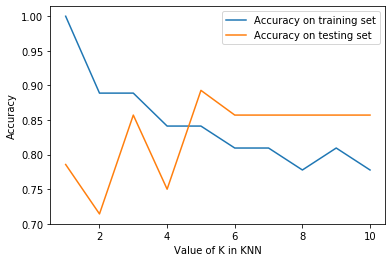

In [541]:
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

We can see that best k is 5

In [542]:
knn=KNeighborsClassifier(n_neighbors=5)

In [543]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [544]:
pred = knn.predict(X_test)

#### Predictions and Evaluations¶

In [545]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [546]:
print(confusion_matrix(y_test,pred))

[[ 6  2]
 [ 1 19]]


In [547]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.90      0.95      0.93        20

    accuracy                           0.89        28
   macro avg       0.88      0.85      0.86        28
weighted avg       0.89      0.89      0.89        28

